In [1]:
#Daily Challenge - Set it Up

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import files

uploaded = files.upload()

# Load dataset (adjust filename/path as needed)
df = pd.read_csv("Palmer_Penguins_Dataset.csv")

print(df.shape)
print(df.columns)
print(df.info())
print(df.head())




Saving Palmer_Penguins_Dataset.csv to Palmer_Penguins_Dataset.csv
(344, 8)
Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex', 'year'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB
None
  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7    

In [9]:
#Cleaning - Exploratory Data Analysis

df_clean = df.copy()
print(df.isnull().sum()) #confirm how many are null
print(df.dtypes) #confirm data types

df_clean = df_clean.dropna()

categories = ["species", "island", "sex"] #change to category
for col in categories:
    df_clean[col] = df_clean[col].astype("category")


print(df_clean.describe(include='category'))


species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64
species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
year                   int64
dtype: object
       species  island   sex
count      333     333   333
unique       3       3     2
top     Adelie  Biscoe  male
freq       146     163   168


/tmp/ipython-input-3375023884.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  species_counts = df_clean.groupby("species").size().sort_values(ascending=True)


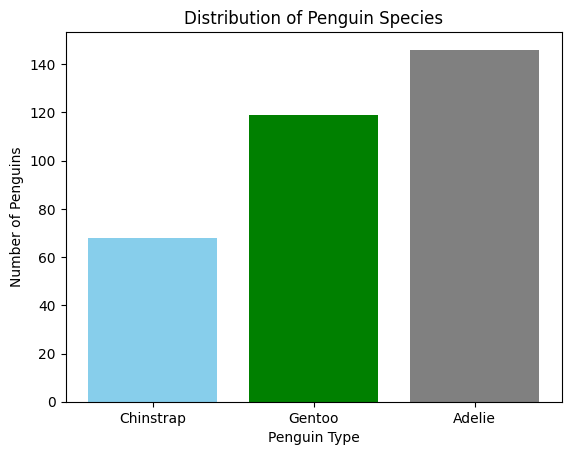

In [21]:
# Species Distribution: Use a bar chart to show the distribution of penguin species.

#Observations: This dataset includes three species, with most penguins classified as "Adelie", fewer as Gentoo, and the least as Chinstrap.

import matplotlib.pyplot as plt

species_counts = df_clean.groupby("species").size().sort_values(ascending=True)
color = ["skyblue", "green", "gray"]

plt.bar(species_counts.index, species_counts.values, color=color)
plt.title('Distribution of Penguin Species')
plt.xlabel('Penguin Type')
plt.ylabel('Number of Penguins')
plt.show()

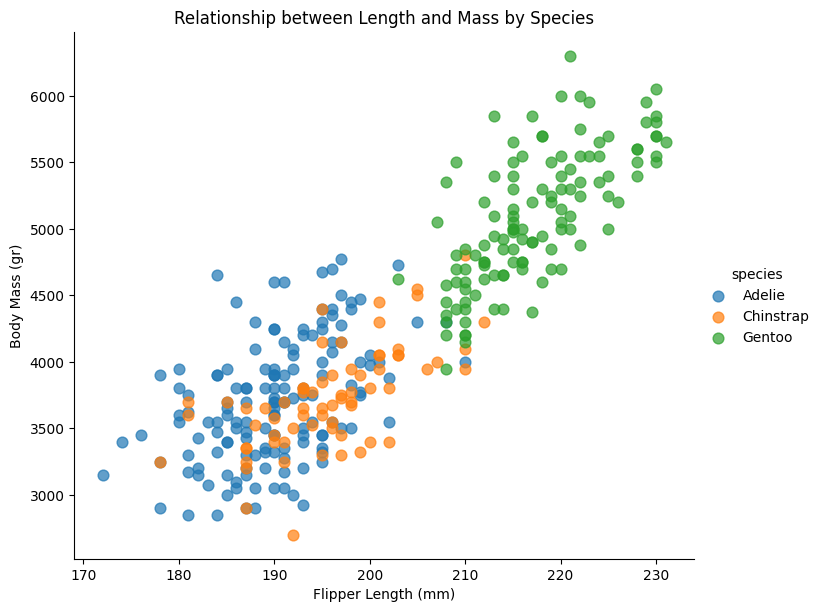

In [26]:
# Flipper Length vs. Body Mass: Create a scatter plot to analyze the relationship between flipper length and body mass, color-coded by species.
#Observations: Penguins with longer flippers tend to have a correspondingly larger body mass. They cluster by species.

df_clean = df_clean.rename(columns={
    "flipper_length_mm": "flipper",
    "body_mass_g": "body"
})

# Create scatter plot with regression line
sns.lmplot(x='flipper', y='body', hue="species", data=df_clean, height=6, aspect=1.2, fit_reg=False, scatter_kws={"s": 60, "alpha": 0.7}  # point size & transparency
)
# Add labels
plt.title('Relationship between Length and Mass by Species')
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Body Mass (gr)')
plt.show()


/tmp/ipython-input-602565656.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  island_count = df_clean.groupby("island").size()


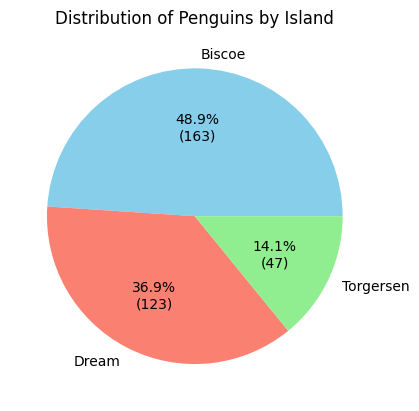

In [33]:
#Island Distribution: Visualize the count of penguins on each island using a pie chart.
#Observation: Almost half of all penguins are found on Biscoe Island, while another 1/3 are on "Dream". The fewest are on Torgersen.
island_count = df_clean.groupby("island").size()
total = island_count.sum()

plt.pie(island_count, labels=island_count.index,autopct=lambda pct: f"{pct:.1f}%\n({int(round(pct*total/100))})", colors=["skyblue", "salmon", "lightgreen"])
plt.title("Distribution of Penguins by Island")
plt.show()




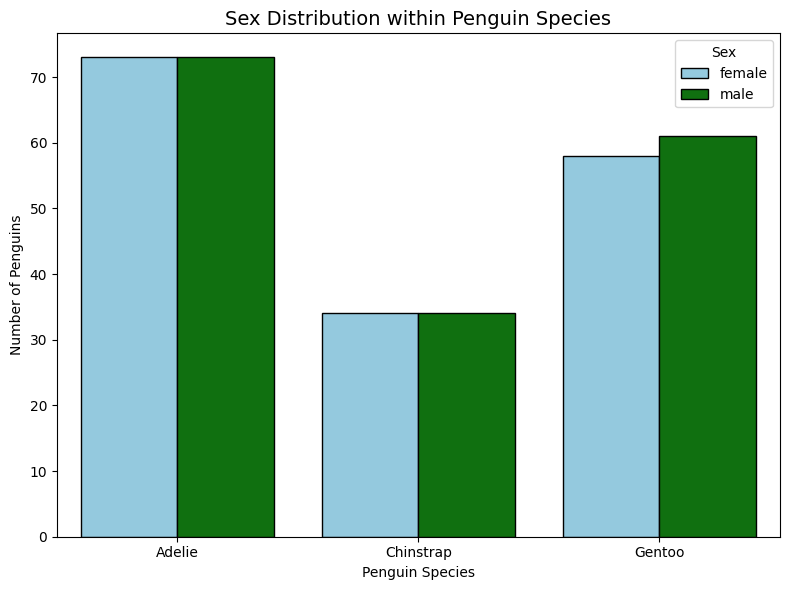

In [39]:
#Sex Distribution within Species: Create grouped bar charts showing the distribution of sex within each penguin species.
#Observation: Species are roughly equal / commensurate by sex.

plt.figure(figsize=(8, 6))
sns.countplot(x="species", hue="sex", data=df_clean, palette=["skyblue", "green"], edgecolor="black")

plt.title("Sex Distribution within Penguin Species", fontsize=14)
plt.xlabel("Penguin Species")
plt.ylabel("Number of Penguins")
plt.legend(title="Sex")
plt.tight_layout()
plt.show()


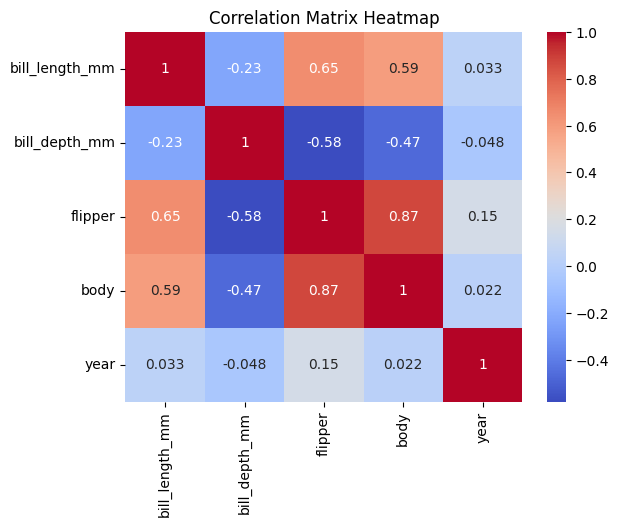

In [40]:
#Heatmap of Correlations: Plot a heatmap to visualize the correlations between numerical variables.
#Observatinos: Bill Length/Bill Depth no correlaton
# Select only numeric columns for correlation
correlation_matrix = df_clean.select_dtypes(include='number').corr()

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix Heatmap")
plt.show()


/tmp/ipython-input-2602437797.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="species", y="flipper", data=df_clean, palette="Pastel1")


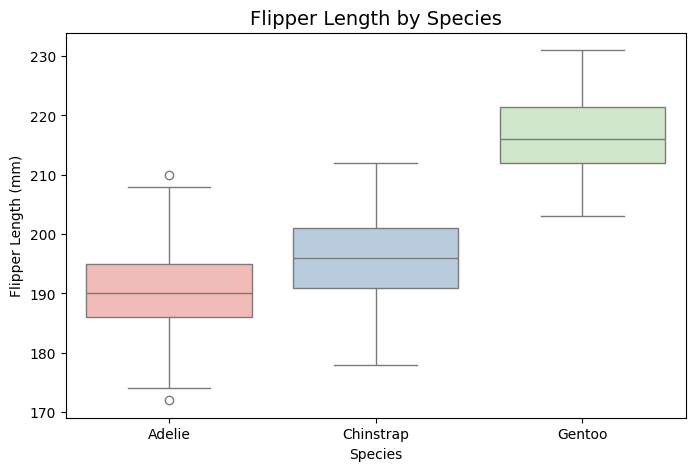

/tmp/ipython-input-2602437797.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="species", y="body", data=df_clean, palette="Pastel2")


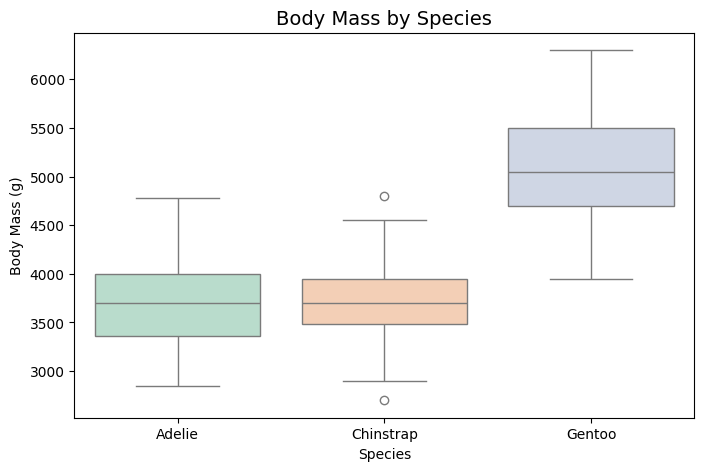

/tmp/ipython-input-2602437797.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="species", y="bill_length_mm", data=df_clean, palette="Set3", ax=axes[0])
/tmp/ipython-input-2602437797.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="species", y="bill_depth_mm", data=df_clean, palette="Set3", ax=axes[1])


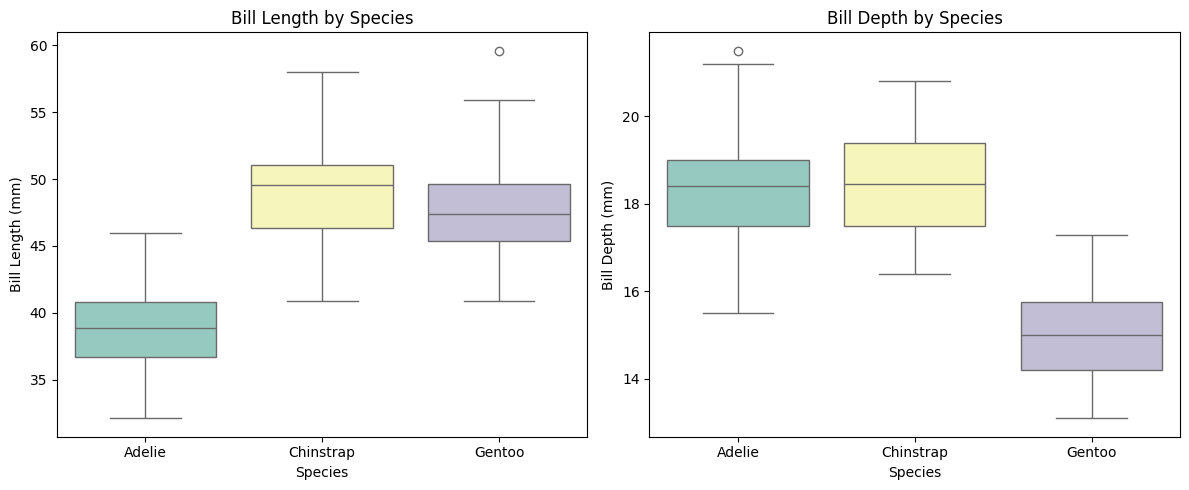

In [43]:
#Boxplots for Measurements: Generate boxplots for flipper length, body mass, and bill measurements, segmented by species.
#Observation: Overall, Gentoo seems to be the biggest.

# Flipper length by species
plt.figure(figsize=(8, 5))
sns.boxplot(x="species", y="flipper", data=df_clean, palette="Pastel1")
plt.title("Flipper Length by Species", fontsize=14)
plt.xlabel("Species")
plt.ylabel("Flipper Length (mm)")
plt.show()

# Body mass by species
plt.figure(figsize=(8, 5))
sns.boxplot(x="species", y="body", data=df_clean, palette="Pastel2")
plt.title("Body Mass by Species", fontsize=14)
plt.xlabel("Species")
plt.ylabel("Body Mass (g)")
plt.show()

# Bill length & depth by species
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(x="species", y="bill_length_mm", data=df_clean, palette="Set3", ax=axes[0])
axes[0].set_title("Bill Length by Species")
axes[0].set_xlabel("Species")
axes[0].set_ylabel("Bill Length (mm)")

sns.boxplot(x="species", y="bill_depth_mm", data=df_clean, palette="Set3", ax=axes[1])
axes[1].set_title("Bill Depth by Species")
axes[1].set_xlabel("Species")
axes[1].set_ylabel("Bill Depth (mm)")

plt.tight_layout()
plt.show()

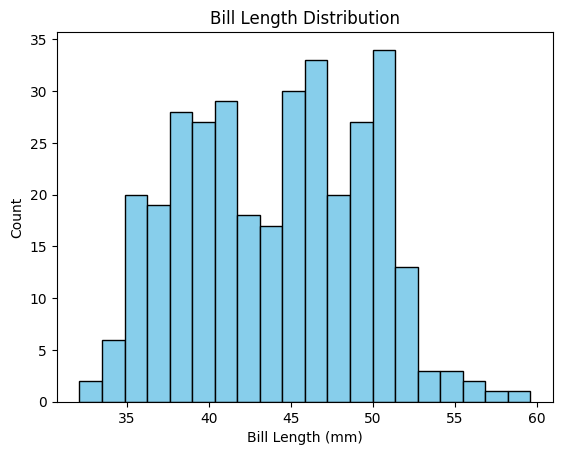

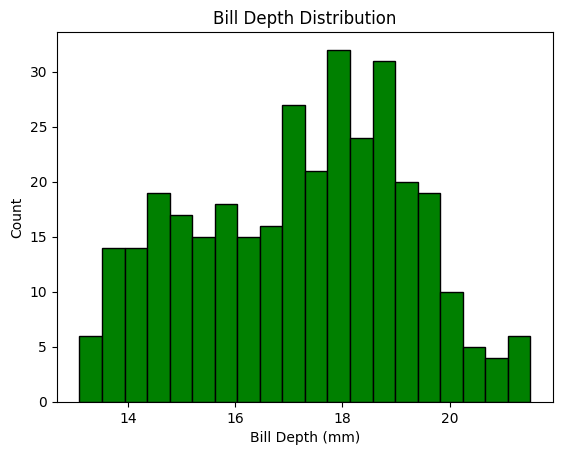

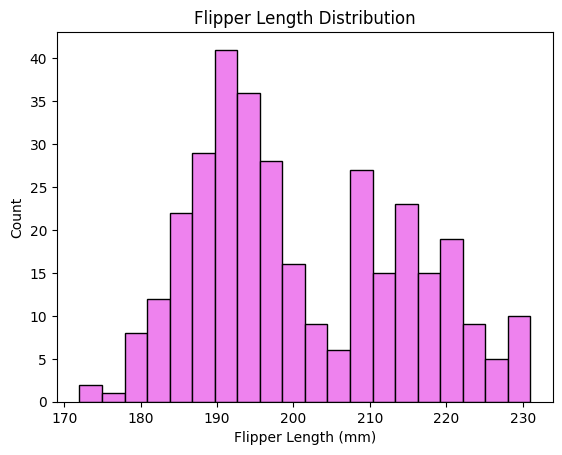

In [44]:
#Histograms of Measurements: Create histograms to show the distribution of key measurements (bill length, bill depth, flipper length).
#Most penguins have bills between 35 and 53 mm long, 17 and 19 mm deep, androughly 190mm long flippers.
plt.hist(df_clean["bill_length_mm"], bins=20, color="skyblue", edgecolor="black")
plt.title("Bill Length Distribution")
plt.xlabel("Bill Length (mm)")
plt.ylabel("Count")
plt.show()

plt.hist(df_clean["bill_depth_mm"], bins=20, color="green", edgecolor="black")
plt.title("Bill Depth Distribution")
plt.xlabel("Bill Depth (mm)")
plt.ylabel("Count")
plt.show()

plt.hist(df_clean["flipper"], bins=20, color="violet", edgecolor="black")
plt.title("Flipper Length Distribution")
plt.xlabel("Flipper Length (mm)")
plt.ylabel("Count")
plt.show()

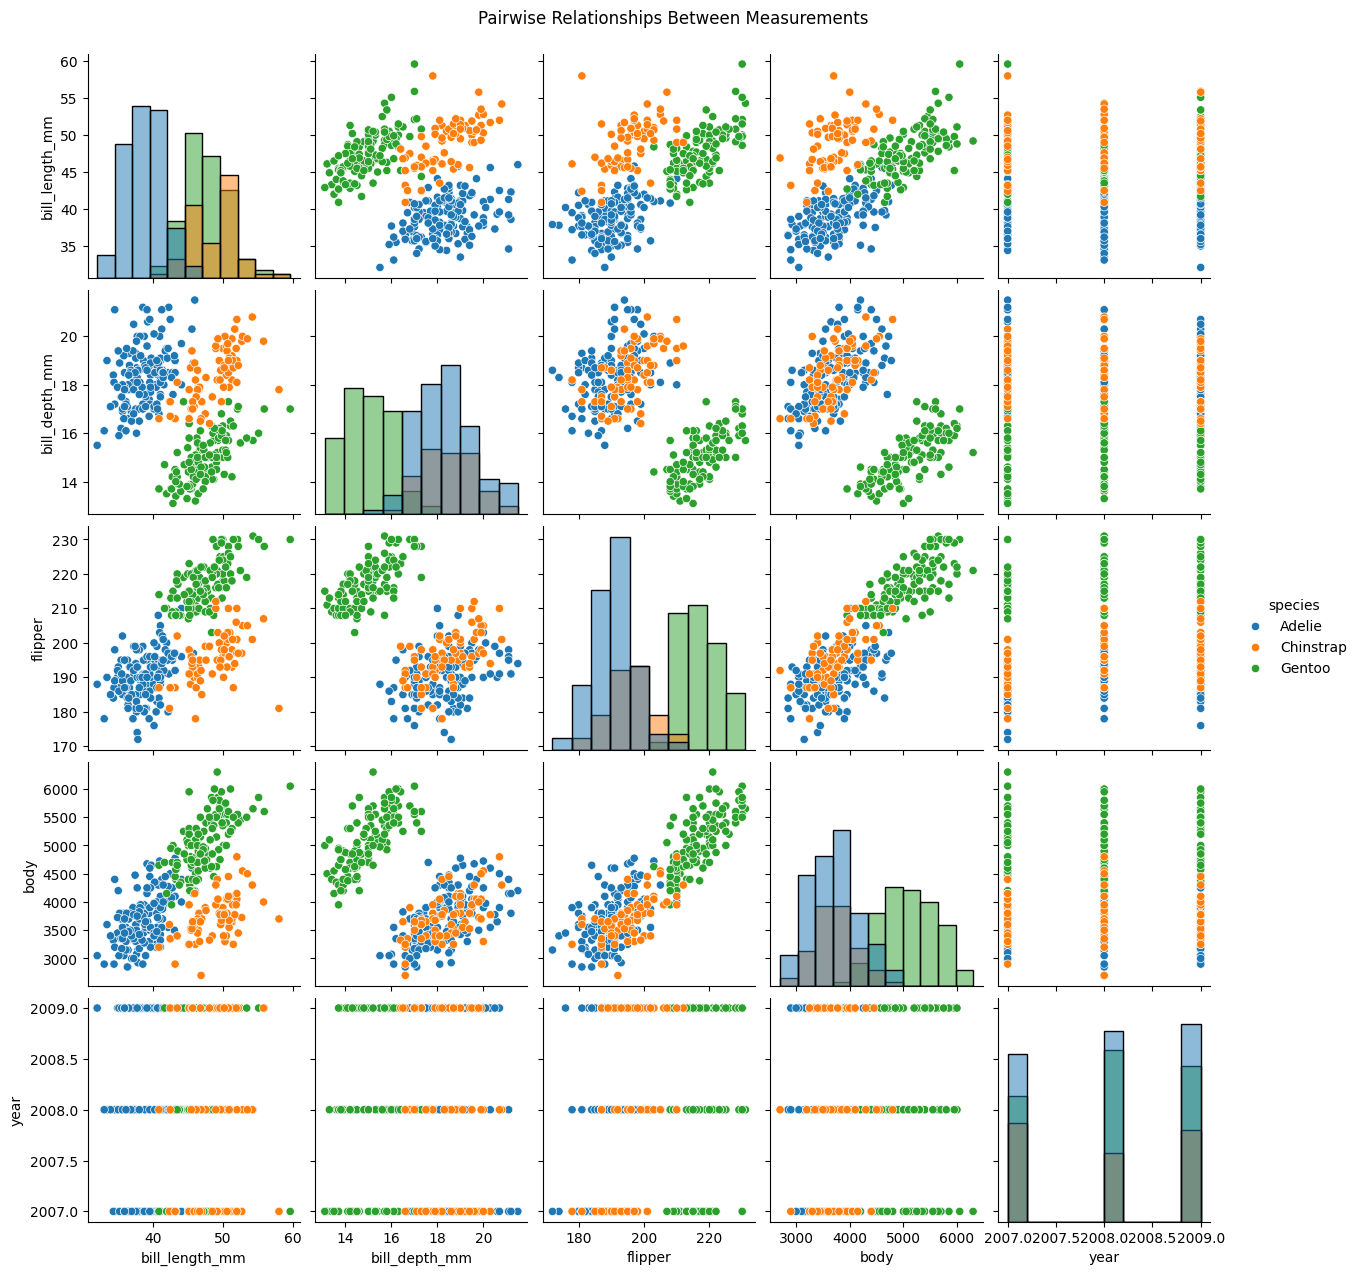

In [45]:
#Visualition

#Observatin: Shows clusters by species (gentoo has large flippers/body mass), chinstrap less, and adelie is smaller.

sns.pairplot(df_clean, hue="species", diag_kind="hist")
plt.suptitle("Pairwise Relationships Between Measurements", y=1.02)
plt.show()
